In [1]:
# Download the MNIST dataset, which is a dataset of 70,000 small images of handwritten digits
import tensorflow as tf     

# It automatically splits the dataset into training and testing data separately 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() 
X_train.shape

(60000, 28, 28)

In [2]:
X_test.shape

(10000, 28, 28)

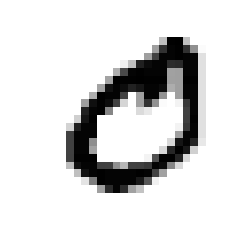

In [3]:
# There are 70,000 images and each image has 784 features. This is because each image is 28X28 pixels, and each
# feature simply represents one pixel's intensity, from 0(white) to 255(black).
# Let's take a peek at one digit from the dataset.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit_image = X_train[21]

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
# The above image looks like a 9,let's see what the label tells us
y_train[36000]

9

In [5]:
# Some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they
# get many similar instances in a row. Shuffling the dataset ensures that this won't happen anymore.
# So let's shuffle this:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [6]:
# Let's simplify the problem for now and only try to identify one digit- for example number 5. This "5-detector" 
# will be an example of a binary classifier , capable of distinguishing between just two classes, 5 and not-5.
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [7]:
# Now let's pick a classifer and train it with a Stochastic Gradient Descent (SGD) classifier, using 
# Scikit-Learn's SGDClassifier class.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train.reshape(60000, 784), y_train_5)

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
# Now we can use it to detect the image of the number 5.
sgd_clf.predict(X_train[36000].reshape(1, 784))

# No doubt it evaluates to False because we've already seen above that it X[36000] is 9.

array([False])

In [9]:
# Let's measure the accuracy of this classifier by implementing StratifiedKFOld
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    print(X_train_folds.shape)
    clone_clf.fit(X_train_folds.reshape(40000,784), y_train_folds)
    y_pred = clone_clf.predict(X_test_fold.reshape(20000,784))
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

# The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each 
# class.At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and 
# makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of 
# correct predictions and outputs the ratio of correct predictions.

(40000, 28, 28)


/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9654
(40000, 28, 28)


/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9586
(40000, 28, 28)


/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.92695


In [10]:
# Now let's use cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation.
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train.reshape(60000, 784), y_train_5, cv=3, scoring="accuracy")

# Wow above 95% accuracy on all cross-valdiation folds.

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

array([0.9654 , 0.9586 , 0.92695])

In [11]:
#  Let's look at a dumb classifier which classifies every single image in the "not-5" class.
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
                        
# Lett's evaluate this model's accuracy
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train.reshape(60000, 784), y_train_5, cv=3, scoring="accuracy")

# It has over 90% accuracy. This is simply because only about 10% of the images are 5s, so if you always guess 
# that an image is not a 5, you will be right about 90% of the time.
# This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially
# when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

array([0.9096 , 0.90815, 0.9112 ])

In [12]:
# Much better way to evaluate the performance of a classifier is to look at the confusion matrix.
# The general idea is to count the number of times instances  of class A are classified as class B.
# Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-valdiation, but instead of
# returning the evaluation scores, it returns the predictions made on each test fold.
# We want to keep our test set untouched for now. 
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train.reshape(60000, 784), y_train_5, cv=3)

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

In [13]:
# Now we can get the confusion matrix using this y_train_pred
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

# The first row of matrix considers the non-5 images (the negative class):
# Here 50,982 were correctly classified as non-5s (they are called true negatives), while the remaining 3,597 were
# wrongly classified as 5s (false positive). 
# The second row considers the iamges of 5s (the positive class):
# Here 705 were wrongly classified as non-5s (false negatives), while the remaining 4,716 were correctly 
# classified as 5s (true positives).

# A perfect classifier would have only true positives and true negatives, so its confusion matrix would have
# nonzero values only on its main diagonal.

array([[52327,  2252],
       [  729,  4692]])

In [14]:
# To calculate precision and sensitivity (also called recall or True Positive Rate):
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

# When it claims an image represents a 5, it is correct only 56% of the time

0.6756912442396313

In [15]:
recall_score(y_train_5, y_train_pred)

# It only detects 86% of the 5s

0.8655229662423907

In [16]:
# It is often convenient to combine precision and recall into a single metric called the F1 score, in particular 
# if you need a simmple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall.
# Where as the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As
# a result, the classifier will only get a high F1 score if both recall and precision are high.

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

# The F1 score favours classifiers that have similar precision and recall.

0.7589162959967649

In [17]:
# SGDClassifier makes its classification decisions after computing a score based on a decision function, and if 
# that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to 
# the negative class.
# Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores 
# that it uses to make predictions, using decision_function() method, which returns a score for each instance.

y_scores = sgd_clf.decision_function(some_digit_image.reshape(1, 784))
y_scores

array([-247761.24624927])

In [18]:
threshold = -300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

# The SGDClassifier uses a threshold equal to 0, so it return False.

array([ True])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

# The SGDClassifier now uses a threshold equal to -300000, so it returns True.

# Therefore, raising the threshold decreases recall but increases precision. And lowering the threshold increases
# recall but decreases precision. There is a kind of tradeoff between precision and recall.


array([False])

In [20]:
# So how can you decide which threshold to use? For this you will first need to get the scores of all instances in
# the training set using cross_val_predict() by:
y_scores = cross_val_predict(sgd_clf, X_train.reshape(60000, 784), y_train_5, cv=3, method="decision_function")
y_scores

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

array([ 494042.28349432, -476020.80139662, -129583.95345211, ...,
        231499.57391062,  160647.08210718, -571512.58037868])

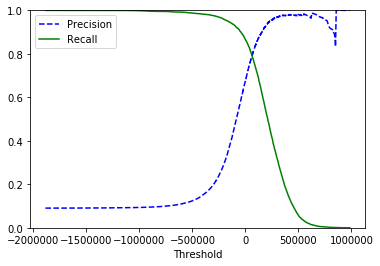

In [21]:
# Now with these scores you can compute precision and recall for all possible thresholds using the 
# precision_recall_curve function:

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Te precision curve is bumpier than the recall curve bcause precision can sometimes go down when you 
# raise the threshold.
# Now you can directly select the threshold value that gives you the best precision/recall tradeoff for your task.

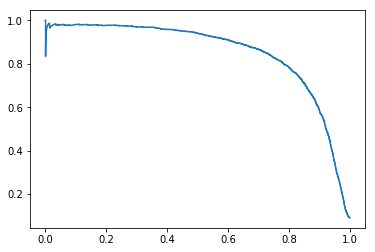

In [22]:
# Another way to select a good precision/recall tradeoff is to plot precision directly against recall.
plt.plot(recalls, precisions)

# You can see that precision really starts to fall sharply around 80% recall.

In [23]:
# Let's suppose you decide to aim for 90% precision. You look up the plot and find that you need a threshold
# of about 70000. To make predictions, instead of calling the classifier's predict() method, you can just run 
# the code:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90)

0.8043023034456501

In [24]:
recall_score(y_train_5, y_train_pred_90)

# As you can see it is fairly easy to create a classifier with virtually any precision you want: just set a high 
# enough threshold, and you're done. Hmm, not so fast. A high-precision classifier is not very useful if its 
# recall is too low!

0.7793764988009593

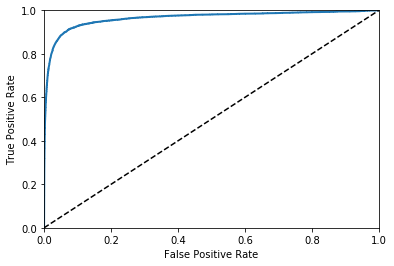

In [25]:
# The Reciever Operating Characteristic (ROC) curve is another tool used with binary classifiers. 
# The ROC curve plots the true positive rate (recall) against the false positive rate (FPR). FPR is the ratio of 
# negative instances that are correctly classified as positive. It is equal to one minus the true negative rate,
# which is the ratio of negative instances that are correctly classified as negative. The TNR is also called s
# specificity. 
# Hence the ROC curve plots sensitivity (recall) versus 1-specificity.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr, tpr)
plt.show()

# Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier 
# produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as 
# far away from that line as possible (towars the top-left corner).

In [26]:
# One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a 
# ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides
# a function to compute the ROC AUC:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

# Since the ROC curve is so similar to the precision/recall (or PR) curve, you should prefer the PR curve whenever
# the positive class is rare or when you care more about the false positives than the false negatives, and the
# ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that
# the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives
# (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve 
# shoudl be closer th the top right corner).

0.9642131433938467

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower rigght". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper 

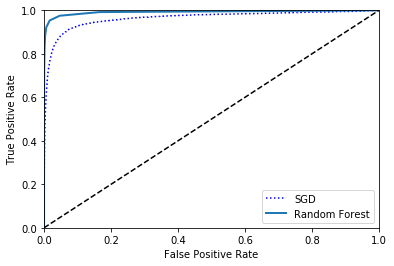

In [27]:
# Let's train a RandomForestClassifier and compare its ROC curve and ROC AUC curve score to the SGDClassifier.
# First, you need to get scores for each instance in the training set. But the RandomForestClassifier class does 
# not have a decision_function() method. Instead it has a predict_proba() method which returns an array containing
# a row per instance and a column per class, each containing the probability that the given instance belongs to 
# the given class (e.g.., 70% chance that the image represents a 5):

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train.reshape(60000, 784), y_train_5, cv=3, 
                                    method="predict_proba")

# But to plot a ROC curve, you need scores, nto probabilities. A simple solution is to use the positive class's
# probability as the score:

y_scores_forest = y_probas_forest[:, 1]   # core = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Now you are ready to plot the ROC curve
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower rigght")
plt.show()

In [28]:
roc_auc_score(y_train_5, y_scores_forest)

# As you can see, the RandomForestClassifier's ROC curve looks much better than the SGD's classifier's. As a 
# result, its ROC AUC curve is also significantly better.

0.9920839941199183

Text(0, 0.5, 'Precision')

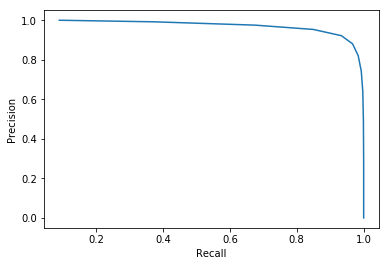

In [29]:
# Let's plot PR curve for RandomForestClassifier.
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)
plt.plot(precisions_forest, recalls_forest)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [30]:
# Let's say you choose 0.5 as the threshold value.
y_train_pred_forest = (y_scores_forest>0.5)
precision_score(y_train_5, y_train_pred_forest)

# You get precision score of 98.61%.

0.9836427939876216

In [31]:
recall_score(y_train_5, y_train_pred_forest)

# And recall score of 82.86.
# Hopefully, you know now how to train binary classifiers, choose the appropriate metric for your task, evaluate
# your classifiers using cross-validation, select the precision/recall tradeoff that fits your needs, and compare
# various models using ROC curves and ROC AUC scores. 

0.8208817561335547

In [32]:
# Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial
# classifiers) can distinguish between more than two classes.

# One way to create a system that can classify the digit images into 10 classes (0 to 9) is to train 10 binary 
# classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then you want to classify
# an image, you get the decision score from each classifier for that image and you select the class whose 
# classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called 
# one-versus-the-rest).

# Another strategy is to train a classifier for every pair of digits: one to distinguish 0s and 1s, another to 
# distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. 
# If there are N classes, you need to train N X (N - 1) / 2 classifiers. The main advantage of OvO is that each
# classifier only needs to be trained on part of the training set for the two classes that it must distinguish.

# Some algorithms (such as Support Vector Machine Classifiers) scale poorly with the size of the training set, so
# for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than 
# training few classifiers on large training sets. For most binary classification algorithms, OvA is preferred.

# Scikit-Learn detects when you try to use a binary classification algorithm for a multinomial class 
# classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO).

# Let's try this with the SGDClassifier:
sgd_clf.fit(X_train.reshape(60000, 784), y_train)
sgd_clf.predict(some_digit_image.reshape(1, 784))

# That was easy! The Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the 
# image, and selected the class with the highest score.

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([0], dtype=uint8)

In [33]:
# To see that this is indeed the case, you can call the decision_function() method.
some_digit_scores = sgd_clf.decision_function(some_digit_image.reshape(1, 784))
some_digit_scores

array([[ 413651.65157637, -512250.9148724 , -457167.60157441,
        -171040.58551469, -542631.65253537, -247761.24624927,
        -694038.40510806, -753845.69777407, -747345.17377602,
        -665652.96833666]])

In [34]:
# The highest score is indeed the one corresponding to the class 0.
i = np.argmax(some_digit_scores) # Returns the indices of the maximum values along an axis.
sgd_classes = sgd_clf.classes_   # Returns all the classes classified.
cls = sgd_clf.classes_[i]        
print("Index of maximum value in some_digit_scores:", i, "\nAll the classified classes:", sgd_classes, 
      "\nClass to which it belongs:", cls)

# When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value.

Index of maximum value in some_digit_scores: 0 
All the classified classes: [0 1 2 3 4 5 6 7 8 9] 
Class to which it belongs: 0


In [35]:
# If you want to force Scikit-Learn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or
# OneVsRestClassifier classes.
# For example, this code creates a multiclass classifier using OvO strategy, based on a SGD classifier:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf  = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train.reshape(60000, 784), y_train)
ovo_clf.predict(some_digit_image.reshape(1, 784))

# len(ovo_clf.estimators_) Returns  N_classes X (N_classes - 1) / 2 estimators used for predictions.

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([0], dtype=uint8)

In [36]:
# Training a RandomForestClassifier:
forest_clf.fit(X_train.reshape(60000, 784), y_train)
forest_clf.predict(some_digit_image.reshape(1, 784))

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0], dtype=uint8)

In [37]:
# This time Scikit-Learn did not have to run OvA or OvO because Random Forest classifiers can directly classify
# instances into multiple classes. You can call predict_proba() to get list of probabilites that the classifier
# assigned to each instance for each class:
forest_clf.predict_proba(some_digit_image.reshape(1, 784))

# You can see that the classifier is really confident about its prediction.

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
# Now let's evaluate SGDClassifier's accuracy using the cross_val_score() function:
cross_val_score(sgd_clf, X_train.reshape(60000, 784), y_train, cv=3, scoring="accuracy")

# It get's over 83% in all test folds.

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

array([0.83793241, 0.87089354, 0.86928039])

In [39]:
# By simply scaling the inputs, we can do much better:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(60000, 784).astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

# StandardScaler() is used for standarization which first subtracts the mean value (so standarized value always 
# have zero mean) and then it divides by the # variance so that the resulting distribution has unit variance.

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

array([0.91186763, 0.90749537, 0.91073661])

In [40]:
# Let's generate the confusion matrix:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/cipher/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, t

array([[5730,    2,   22,    8,   10,   52,   43,   10,   41,    5],
       [   1, 6485,   45,   26,    7,   35,    9,    9,  114,   11],
       [  54,   41, 5304,  110,   79,   28,   94,   68,  163,   17],
       [  48,   41,  133, 5339,    2,  226,   34,   62,  148,   98],
       [  23,   25,   33,    9, 5393,    8,   49,   30,   81,  191],
       [  67,   42,   32,  191,   79, 4616,  100,   25,  173,   96],
       [  40,   22,   52,    2,   44,   95, 5607,    7,   48,    1],
       [  23,   21,   62,   30,   55,   10,    7, 5807,   18,  232],
       [  50,  150,   72,  158,   12,  150,   56,   29, 5051,  123],
       [  41,   32,   26,   83,  173,   39,    2,  198,   85, 5270]])

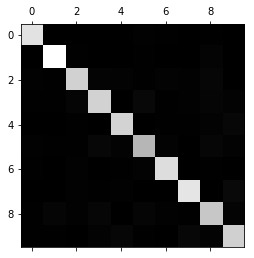

In [41]:
# That's a lot of numbers. It's often convenient to look at an image representation of the confusion matrix, usin
# Matplotlib's matshow() function:

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# This confusion matrix looks fairly good, since most images are on the main diagonal, which means that they were 
# classified correctly. The 5s look slightly darker than the other digits, which could mean that there are fewer
# images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits.

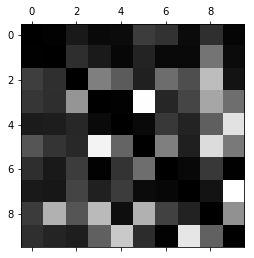

In [42]:
# Let's focus the plot on the errors. Firstly, you need to divide each value in the confusion matrix by the number
# of images in the corresponding class, so you can compare error rates instead of absolute number of errors:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Now let's fill the diagonal with zeros to keep only the errors, and let's plot the result:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Remember rows represent actual classes, while columns represent predicted classes.
# The columns for classes 8 and 9 are quite bright, which tells you that many images get misclassified as 8s or 9s
# Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s and 9s are often confused 
# with other digits. Conversely, some rows are pretty dark, such as row 1: this means that most 1s are classified
# correctly (a few are confused with 8s, but that's about it).

# Analyzing the confusion matrix can often give you insights on ways to imporve your classifier. Looking at this 
# plot, it seems that your efforts should be spent on improving classification of 8s and 9s, as well as fixing the
# specific 3/5 and 7/9 confusions.

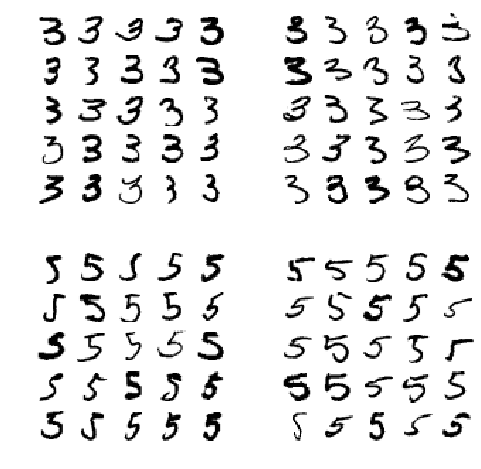

In [43]:
# Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it 
# is failing. For example, let's plot examples of 3s and 5s:

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


# The two 5x5 plots on the left show digits classified as 3s, and the two 5x5 blocks on the right show images 
# classified as 5s. Some of the digits that the classifier gets wrong are so badly writtent that even a human 
# would have trouble classifying them (e.g., the 5 on the 8th row and 1st column truly look like 3).

# We used a simple SGDClassifier, which is a linear model. All it does is assign a weight per class to each pixel,
# and when it sees a new iage it just sums up the weighted pixel intensities to get a score for each class. So 
# since 3s and 5s differ only by a few pixels, this model will easily confuse them.
# The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom 
# arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, 
# and vice versa. In otheer words, this classifier is quite sensitive to image shifting and rotation. So one way
# to reduce the 3/5 confusion would be to preprocess the images to ensure that they are well centered and not too
# rotated. Thie will probably help reduce other errors as well.

In [44]:
# In some cases we want our classifier to output multiple classes for each instance. Such a classifier system
# that outputs multiple binary labels is called a multilabel classification system.

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train.reshape(60000, 784), y_multilabel)

# This code creates a y_multilabel array containing two target labels for each digit image: the first indicates
# whether or not the digit is large (7, 8 or 9) and the second indicates whether or not it is odd.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
# Now you can make prediction, and notice that it outpus two labels:
knn_clf.predict(some_digit_image.reshape(1, 784))

# And it get's right! The digit 0 is indeed not large (False) and not odd (False).

array([[False, False]])

In [46]:
# There are many ways to evaluate a multilabel classifier. For example, one approach is to measure the F1 score
# for each individual label, then simply compute the avarage score. 
# Note: The F1 score is the harmonic mean of precision and recall and the classifier will only get a high F1 score
#       if both recall and precision are high.
y_train_knn_pred = cross_val_predict(knn_clf, X_train.reshape(60000, 784), y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

# This assumes that all labels are equally important, which may not be the case. In particular, if you have many
# more imagess of 5s, you may want to give more weight to the classifier's score on images of 5. 
# One simple option is to give each label a weight equal to its suppotr (i.e., the number of instances with that
# target label). To do this, simple set average="weighted" in the preceding code.

0.9686374884114519

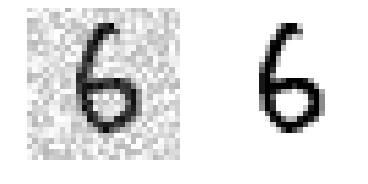

In [47]:
# The last type of classification we are going to discuss here is called multioutput-multiclass classification 
# (or simply multioutput classification). It is simply a generalization of multilabel classification where each 
# label can be multiclass (i.e., it can have more than two possible values).

# To illustrate this, let's build a system that removes noise from images. 
# Notice that the classifier's output is multilabel (one label per pixel) and each label can have multiple values
# (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

# Let's start by creating the training and test sets by taking the MNIST images and adding noise to their pixel
# intenisities using NumPy's randint() function. The target images will be the original images:

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train.reshape(60000, 784) + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test.reshape(10000, 784) + noise
y_train_mod = X_train
y_test_mod = X_test

# Let's take a peek at an image from the test set:
some_index = 21
plt.subplot(121); plot_digits(X_test_mod[some_index].reshape(1, 784))
plt.subplot(122); plot_digits(y_test_mod[some_index].reshape(1, 784))
plt.show()

# On the left is the noisy input image, and on the right is the clean target image.

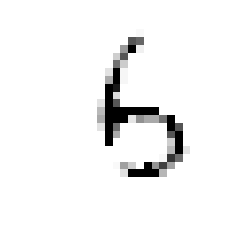

In [48]:
# Now let's train the classifier and make it clean this image:
knn_clf.fit(X_train_mod.reshape(60000, 784), y_train_mod.reshape(60000, 784))
clean_digit = knn_clf.predict(X_test_mod[some_index].reshape(1, 784))
plot_digits(clean_digit)

In [51]:
# To find good hyperparameter values, let's try a grid search on the weights and n_neighbors hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train.reshape(60000, 784), y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 869.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [52]:
# The best combination of parameters is:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [53]:
# And the best score is:
grid_search.best_score_

0.9738833333333333

In [59]:
# Now use the hyperparameters found out by grid search for prediction task as:

from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test.reshape(10000, 784))
accuracy_score(y_test, y_pred)

0.9714

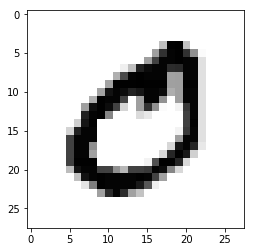

In [62]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

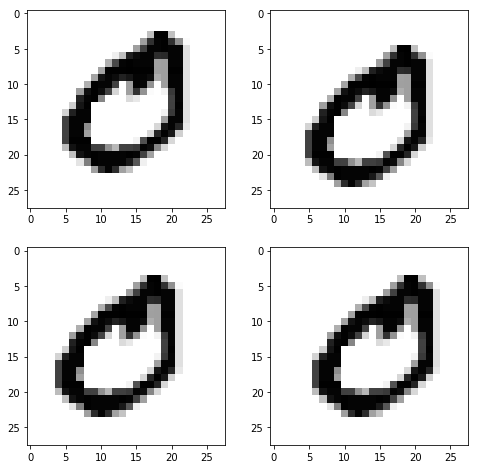

In [93]:
# This function shifts the image one pixel down, one pixel up, one pixel left and one pixel right respectively.
# And the plots the shifted images. You can call this function for each image in the training set, create four
# shifted copies (one per direction) and then add them to the training set. Finally, train your best model
# on this expanded training set and measure its accuracy on the test set. You should observe that your model 
# performs even better now! This technique of artificially growing the training set is called ddata augmentation
# or training set expansion.

from scipy.ndimage.interpolation import shift

def shift_the_image(some_digit_image):
    shifted_digit_image_down=shift(some_digit_image, [1, 0])
    shifted_digit_image_up=shift(some_digit_image, [-1, 0])
    shifted_digit_image_right=shift(some_digit_image, [0, 1])
    shifted_digit_image_left=shift(some_digit_image, [0, -1])
    figure, axes = plt.subplots(2, 2, figsize=(8, 8))
    axes[0,0].imshow(shifted_digit_image_up, cmap=matplotlib.cm.binary, interpolation="nearest")
    axes[0,1].imshow(shifted_digit_image_down, cmap=matplotlib.cm.binary, interpolation="nearest")
    axes[1,0].imshow(shifted_digit_image_left, cmap=matplotlib.cm.binary, interpolation="nearest")
    axes[1,1].imshow(shifted_digit_image_right, cmap=matplotlib.cm.binary, interpolation="nearest")
    
shift_the_image(some_digit_image)